In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
w19 = pd.read_csv('Data/Processed/weekend_geo_19.csv', dtype={'WEEK':'object','DAY_WEEK':'object','ZIP':'object'})
w20 = pd.read_csv('Data/Processed/weekend_geo_20.csv',dtype={'WEEK':'object','DAY_WEEK':'object','ZIP':'object'})
w21 = pd.read_csv('Data/Processed/weekend_geo_21.csv',dtype={'WEEK':'object','DAY_WEEK':'object','ZIP':'object'})

w19 = w19[w19.BOROUGH.isin(['Manhattan','Brooklyn'])]
w20 = w20[w20.BOROUGH.isin(['Manhattan','Brooklyn'])]
w21 = w21[w21.BOROUGH.isin(['Manhattan','Brooklyn'])]

In [3]:
w19 = w19.groupby(['STATION','WEEK','DAY_WEEK','ZIP','BOROUGH']).ENTRIES.sum().reset_index()
w20 = w20.groupby(['STATION','WEEK','DAY_WEEK','ZIP']).ENTRIES.sum().reset_index()
w21 = w21.groupby(['STATION','WEEK','DAY_WEEK','ZIP']).ENTRIES.sum().reset_index()

In [4]:
weekend = w19.merge(w20, on=['STATION','WEEK','DAY_WEEK','ZIP'], suffixes=(['_19','_20']))
weekend = weekend.merge(w21, on= ['STATION','WEEK','DAY_WEEK','ZIP'])
weekend.head()

,STATION,WEEK,DAY_WEEK,ZIP,BOROUGH,ENTRIES_19,ENTRIES_20,ENTRIES
0,1 AV,23,3,10009,Manhattan,12389.0,4571.0,15879.0
1,1 AV,23,4,10009,Manhattan,9831.0,3761.0,14657.0
2,1 AV,23,5,10009,Manhattan,6470.0,2745.0,11843.0
3,1 AV,24,3,10009,Manhattan,13092.0,5462.0,15824.0
4,1 AV,24,4,10009,Manhattan,9612.0,4673.0,15066.0


In [15]:
#weekend['ENTRIES'] = weekend.ENTRIES.shift(1)
boozy_zips = ['10019','10003','10036','11211','11201','11215']

### weekend to weekend

In [16]:
weekly_sum = weekend.groupby(['WEEK']).sum().reset_index()
daily_sum = weekend.groupby(['DAY_WEEK']).sum().reset_index()
boozy_weekly_sum = weekend[weekend.ZIP.isin(boozy_zips)].groupby('WEEK').sum().reset_index()

Text(48.12148055555555, 0.5, 'Total Entries (10M)')

<Figure size 720x1080 with 0 Axes>

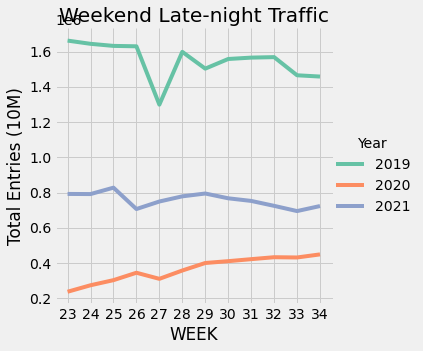

In [17]:
boozy_weekly_sum = (boozy_weekly_sum.rename(columns={'ENTRIES_19':'2019',
                                         'ENTRIES_20':'2020',
                                         'ENTRIES':'2021'}))
weekly_melted = (boozy_weekly_sum.melt(id_vars=['WEEK'], var_name='Year'
                                ,value_name='WEEKEND_ENTRIES'))
plt.figure(figsize=(10,15))
sns.relplot(data=weekly_melted, x="WEEK", y="WEEKEND_ENTRIES", hue="Year",kind="line", palette='Set2', legend=True)
plt.title('Weekend Late-night Traffic')
plt.ylabel('Total Entries (10M)')


<Figure size 720x1080 with 0 Axes>

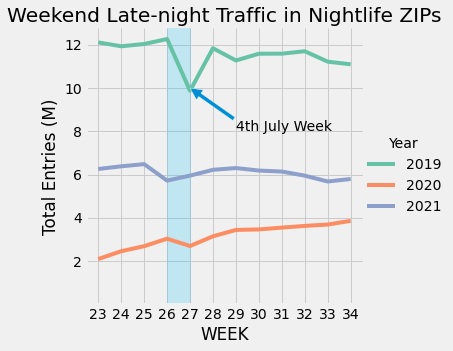

In [24]:
weekly_sum = (weekly_sum.rename(columns={'ENTRIES_19':'2019',
                                         'ENTRIES_20':'2020',
                                         'ENTRIES':'2021'}))
weekly_melted = (weekly_sum.melt(id_vars=['WEEK'], var_name='Year'
                                ,value_name='WEEKEND_ENTRIES'))

plt.figure(figsize=(10,15))
sns.relplot(data=weekly_melted, x="WEEK", y="WEEKEND_ENTRIES", hue="Year",kind="line", palette='Set2', legend=True)
plt.title('Weekend Late-night Traffic in Nightlife ZIPs')
plt.ylabel('Total Entries (M)')
plt.axvspan(xmin='26', xmax='27', color='DeepSkyBlue', alpha=.2, label='4th July week')
plt.ylim(bottom=0)
plt.annotate('4th July Week', xy=('27',10000000), xytext=('29',8000000), arrowprops={})
plt.yticks([2000000,4000000,6000000,8000000,10000000,12000000],[2,4,6,8,10,12])
plt.savefig('Visualizations/comparison_years_boozy.png', bbox_inches='tight')
#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
# the dip in weeks 26 or 27 is 4th July weekend. 

In [8]:
weekend.head(2)

,STATION,WEEK,DAY_WEEK,ZIP,BOROUGH,ENTRIES_19,ENTRIES_20,ENTRIES
0,1 AV,23,3,10009,Manhattan,12389.0,4571.0,15879.0
1,1 AV,23,4,10009,Manhattan,9831.0,3761.0,14657.0


### Top Stations

In [9]:
manh = (weekend.loc[:,['STATION','ZIP','BOROUGH','ENTRIES']]
        [weekend.ZIP.isin(['10019','10003','10036'])])
brook = (weekend[weekend.ZIP.isin(['11211','11201','11215'])])

In [10]:
manh_top = (manh.groupby('STATION')['ENTRIES'].sum().reset_index())
manh_top = manh_top.sort_values('ENTRIES', ascending=False).reset_index(drop=True)

brook_top = (brook.groupby('STATION')['ENTRIES'].sum().reset_index())
brook_top = brook_top.sort_values('ENTRIES', ascending=False).reset_index(drop=True)

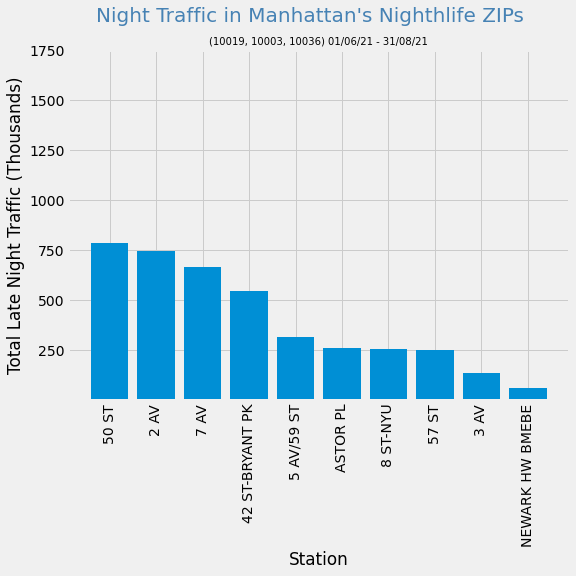

In [11]:

plt.figure(figsize=(8,6))
plt.bar(x=manh_top.STATION, height=manh_top.ENTRIES)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.suptitle("Night Traffic in Manhattan's Nighthlife ZIPs", size=20, c='steelblue')
plt.title('(10019, 10003, 10036) 01/06/21 - 31/08/21', size=10)
plt.xlabel('Station')
plt.xticks(rotation=90)
plt.ylabel('Total Late Night Traffic (Thousands)')
plt.yticks(range(250000,1750001,250000),[250,500,750,1000,1250,1500,1750])
plt.savefig('Visualizations/manh_top.png',bbox_inches='tight')

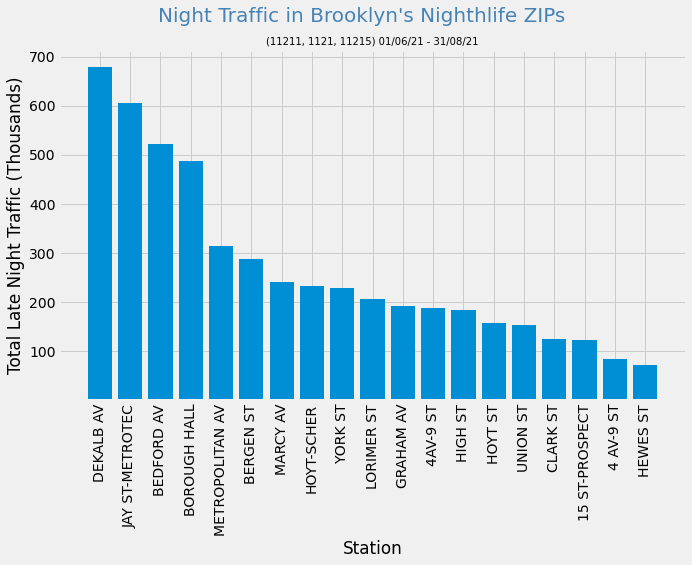

In [12]:
plt.figure(figsize=(10,6))
plt.bar(x=brook_top.STATION, height=brook_top.ENTRIES)
#plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.suptitle("Night Traffic in Brooklyn's Nighthlife ZIPs", size=20, c='steelblue')
plt.title('(11211, 1121, 11215) 01/06/21 - 31/08/21', size=10)
plt.xlabel('Station')
plt.xticks(rotation=90)
plt.ylabel('Total Late Night Traffic (Thousands)')
plt.yticks(range(100000,700001,100000),[100,200,300,400,500,600,700])
plt.savefig('Visualizations/brook_top.png',bbox_inches='tight')

### Top stations through the years

In [33]:
boozy_total.bar()

AttributeError: 'DataFrame' object has no attribute 'bar'

<Figure size 648x360 with 0 Axes>

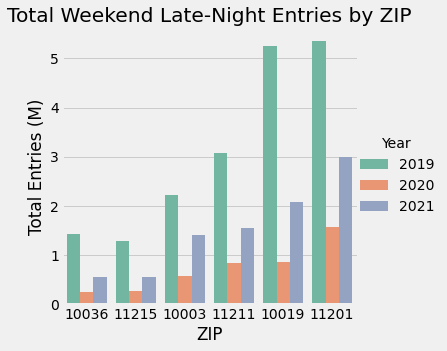

In [94]:
boozy_total_st = (weekend[weekend.ZIP.isin(boozy_zips)].groupby('ZIP').sum().reset_index()
                  .sort_values('ENTRIES').reset_index(drop=True))
boozy_total_st = (boozy_total_st.rename(columns={'ENTRIES_19':'2019',
                                         'ENTRIES_20':'2020',
                                         'ENTRIES':'2021'}))
boozy_total_st_melted = (boozy_total_st.melt(id_vars=['ZIP'], var_name='Year'
                                ,value_name='WEEKEND_ENTRIES'))

plt.figure(figsize=(9,5))
(sns.catplot(data=boozy_total_st_melted, x='ZIP', y='WEEKEND_ENTRIES', kind='bar',
             ci=None, hue='Year', palette='Set2', legend=True))
plt.title('Total Weekend Late-Night Entries by ZIP')
plt.yticks(range(0,5000001,1000000),range(0,6))
plt.ylabel('Total Entries (M)')
plt.savefig('Visualizations/total_entries_by_zip.png',bbox_inches='tight')

In [57]:
boozy_total = weekend[weekend.ZIP.isin(boozy_zips)].sum().reset_index()
boozy_total.sort_values('ENTRIES').reset_index(drop=True)
boozy_total = (boozy_total.rename(columns={'ENTRIES_19':'2019',
                                         'ENTRIES_20':'2020',
                                         'ENTRIES':'2021'}))
boozy_total_st_melted = (boozy_total_st.melt(id_vars=['ZIP'], var_name='Year'
                                ,value_name='WEEKEND_ENTRIES'))
#boozy_total_melted = (boozy_total.melt(id_vars=['ZIP'], var_name='Year'
#                                ,value_name='WEEKEND_ENTRIES'))

KeyError: 'ENTRIES'

In [60]:
boozy_total = weekend[weekend.ZIP.isin(boozy_zips)]
boozy_total

,STATION,WEEK,DAY_WEEK,ZIP,BOROUGH,ENTRIES_19,ENTRIES_20,ENTRIES
394,15 ST-PROSPECT,23,3,11215,Brooklyn,12932.0,1127.0,4620.0
395,15 ST-PROSPECT,23,4,11215,Brooklyn,9988.0,998.0,4075.0
396,15 ST-PROSPECT,23,5,11215,Brooklyn,6671.0,805.0,3185.0
397,15 ST-PROSPECT,24,3,11215,Brooklyn,14434.0,1317.0,4814.0
398,15 ST-PROSPECT,24,4,11215,Brooklyn,11517.0,1255.0,3994.0
...,...,...,...,...,...,...,...,...
7648,YORK ST,33,4,11201,Brooklyn,0.0,3468.0,6523.0
7649,YORK ST,33,5,11201,Brooklyn,0.0,2516.0,3465.0
7650,YORK ST,34,3,11201,Brooklyn,0.0,4773.0,7199.0
7651,YORK ST,34,4,11201,Brooklyn,0.0,3763.0,5614.0


### Day to day

In [13]:
manh_top = (manh.groupby('STATION').sum().reset_index()
            .rename(columns={'ENTRIES_19':'2019','ENTRIES_20':'2020','ENTRIES':'2021'}))
manh_melted = (manh_top.melt(id_vars=['STATION'], var_name='Year', value_name='TOTAL_ENTRIES'))
sns.catplot(data=top_manh, x='STATION', y='ENTRIES_19', kind='bar')

NameError: name 'top_manh' is not defined

In [ ]:
daily_sum = (daily_sum.rename(columns={'ENTRIES_19':'2019',
                                         'ENTRIES_20':'2020',
                                         'ENTRIES':'2021'}))
daily_melted = (daily_sum.melt(id_vars=['DAY_WEEK'], var_name='Year'
                                ,value_name='WEEKEND_ENTRIES'))

sns.relplot(data=daily_melted, x="DAY_WEEK", y="WEEKEND_ENTRIES", hue="Year",kind="line", palette='Set2', legend=True)
#sns.catplot(data=daily_sum, x='DAY_WEEK', y=['ENTRIES_19','ENTRIES_20','ENTRIES'], king='bar', palette='Set2')
plt.title('Weekend Late-night Traffic')
plt.ylabel('Total Entries')
plt.ylim(bottom=0)
plt.show()
# the dip in weeks 26 or 27 is 4th July weekend. 

### Day of Week